# Ford GoBike System Data
## by (Abrar EL-Mogy)

## Preliminary Wrangling

> **Ford GoBike** dataset includes information about individual rides during February 2019.

In [1]:
# import all packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar

%matplotlib inline

In [2]:
#load our dataset
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#check original data shape
df.shape

(183412, 16)

In [4]:
#remove unneeded columns
data = df.drop(["start_station_id", "end_station_id","start_station_longitude", 
                  "start_station_latitude", "end_station_latitude",
                  "end_station_longitude", "bike_share_for_all_trip",
                   "start_station_name","end_station_name", "bike_id", "end_time"], axis=1)
data.head()

,duration_sec,start_time,user_type,member_birth_year,member_gender
0,52185,2019-02-28 17:32:10.1450,Customer,1984.0,Male
1,42521,2019-02-28 18:53:21.7890,Customer,NaN,NaN
2,61854,2019-02-28 12:13:13.2180,Customer,1972.0,Male
3,36490,2019-02-28 17:54:26.0100,Subscriber,1989.0,Other
4,1585,2019-02-28 23:54:18.5490,Subscriber,1974.0,Male


Since the minimum value of duration is 1 sec so i will convert ride duration from seconds to minutes not hours to be more readable

In [5]:
#convert ride duration from seconds to minutes
data['duration_min'] = data.duration_sec // 60
data = data.drop(["duration_sec"], axis=1)
data.head()

,start_time,user_type,member_birth_year,member_gender,duration_min
0,2019-02-28 17:32:10.1450,Customer,1984.0,Male,869
1,2019-02-28 18:53:21.7890,Customer,NaN,NaN,708
2,2019-02-28 12:13:13.2180,Customer,1972.0,Male,1030
3,2019-02-28 17:54:26.0100,Subscriber,1989.0,Other,608
4,2019-02-28 23:54:18.5490,Subscriber,1974.0,Male,26


In [6]:
data['duration_min'].min()

1

In [7]:
#check datatypes of columns
data.dtypes

start_time            object
user_type             object
member_birth_year    float64
member_gender         object
duration_min           int64
dtype: object

• We need to split **start_time** column to day and hour columns, so we need to convert it to datatime type.

• Since this dataset is only for **February 2019**, so we don't need to create columns for year and month.

In [8]:
#convert type of 'start_time' column to datetime
data['start_time'] = pd.to_datetime(data['start_time'])

In [9]:
#data['start_month'] = data['start_time'].dt.month
#data['start_year'] = data['start_time'].dt.year
data['start_day'] = data['start_time'].dt.strftime("%A")
data['start_hour'] = data['start_time'].dt.hour

In [10]:
#after splitting start_time column, we don't need it anymore, we can drop this column
data = data.drop(["start_time"], axis=1)
data.head()

,user_type,member_birth_year,member_gender,duration_min,start_day,start_hour
0,Customer,1984.0,Male,869,Thursday,17
1,Customer,NaN,NaN,708,Thursday,18
2,Customer,1972.0,Male,1030,Thursday,12
3,Subscriber,1989.0,Other,608,Thursday,17
4,Subscriber,1974.0,Male,26,Thursday,23


In [11]:
#we need to check if any null values in datset
data.isna().sum()

user_type               0
member_birth_year    8265
member_gender        8265
duration_min            0
start_day               0
start_hour              0
dtype: int64

In [12]:
#drop null values
data.dropna(inplace=True)

In [13]:
#we need to check if any strange values in gender categorical variable
data.member_gender.unique()

array(['Male', 'Other', 'Female'], dtype=object)

**member_gender** variable looks great, no falsy data.

In [14]:
#create age column
data['age'] =  pd.to_datetime('today').year - data.member_birth_year 
data.head()

,user_type,member_birth_year,member_gender,duration_min,start_day,start_hour,age
0,Customer,1984.0,Male,869,Thursday,17,37.0
2,Customer,1972.0,Male,1030,Thursday,12,49.0
3,Subscriber,1989.0,Other,608,Thursday,17,32.0
4,Subscriber,1974.0,Male,26,Thursday,23,47.0
5,Subscriber,1959.0,Male,29,Thursday,23,62.0


In [15]:
data.shape

(175147, 7)

### What is the structure of your dataset?

> Our dataset has [175147] row and 7 column, we dropped all unneeded columns and create columns from existing columns that will make our investigation easier such as: 'age', 'start_hour', 'start_day'.

### What is/are the main feature(s) of interest in your dataset?

> I am interested to know When are the most trips taken[hour, day]? and figure out if it depends on any other factor. Also what effects the duration of the trip. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> age, gender and user type.

## Univariate Exploration

In [16]:
base_color = sb.color_palette()[0]

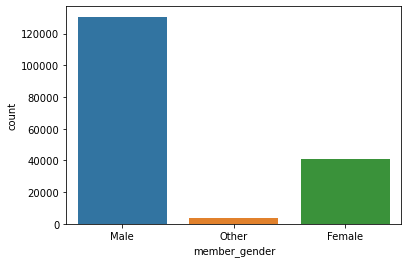

In [17]:
sb.countplot(data=data, x='member_gender');

We can found that the majority of the users are males.

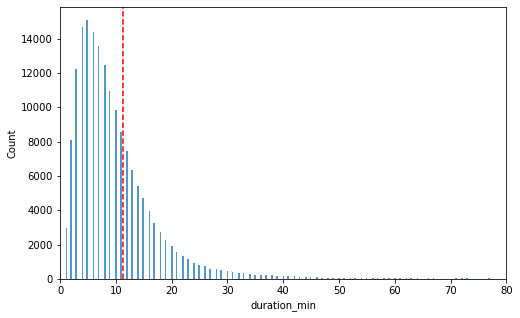

In [18]:
plt.figure(figsize=[8, 5])
sb.histplot(data=data, x="duration_min")
plt.axvline(data.duration_min.mean(), linestyle = '--', color='r')
plt.xlim((0,80));

From the above duration distribuation chart, we can see that the average of the trips is around 10 mins but the strange is that there are some trips between 20 and 80 mins which is a very long duration.

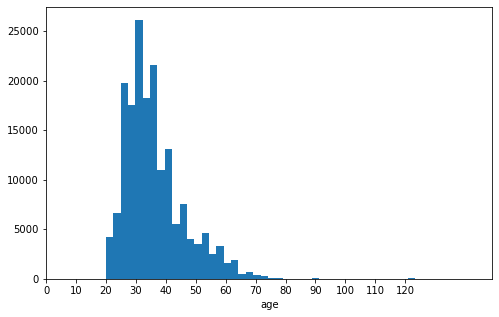

In [19]:
plt.figure(figsize=[8, 5])
plt.hist(data=data, x='age', bins=50);
plt.xticks([0,10,20,30,40,50,60,70,80,90,100,110,120])
plt.xlabel('age');

From the above histogram, we can find that we have outliers with age greater than 100, we need to clean data and remove age outliers

In [20]:
#removing age outliers
data = data.query("age <=100")
data.shape 

(175072, 7)

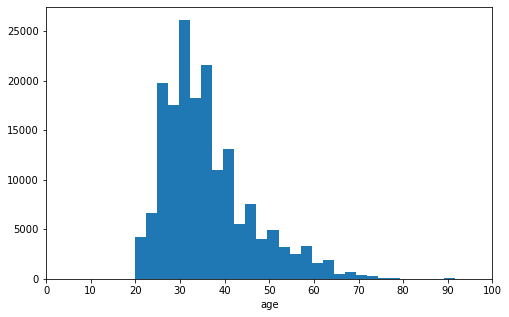

In [21]:
plt.figure(figsize=[8, 5])
plt.hist(data=data, x='age', bins=30);
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.xlabel('age');

From the above histogram we can find that the age of majority of the riders is 30 years.

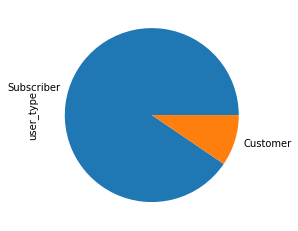

In [22]:
data['user_type'].value_counts().plot(kind='pie');

From the above chart, the most of the riders are subscribers.

#### Let's see the busiest hour and day.

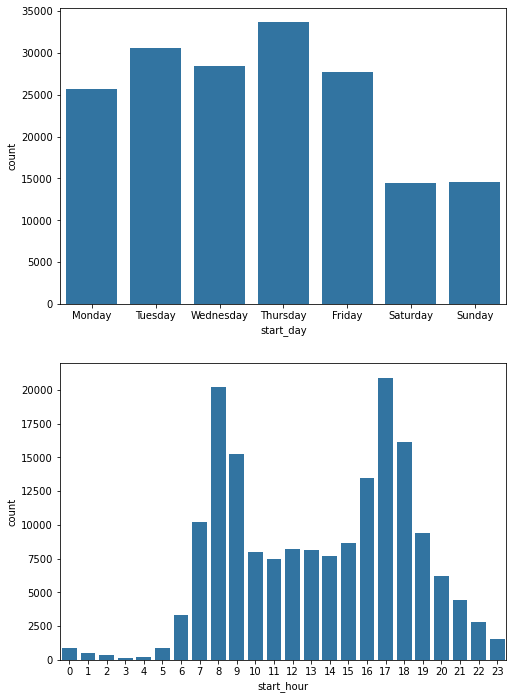

In [23]:
fig, ax = plt.subplots(nrows=2, figsize = [8,12])
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.countplot(data=data, x='start_day', order=day_order, color=base_color ,ax=ax[0]);
sb.countplot(data=data, x='start_hour', color=base_color, ax=ax[1]);

• From the above charts we can find that **Saturday** and **Sunday** are the least busy days which is logical as these days are considers as vacation days.

• Also we can find that the distribuation is **bimodal**, as expected the busiest hours are **8 am** and **5 pm**, as these hours considers as working hours/rush hours.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> From our above investigation, everything is normal. The busiest hours is in the rush hours interval also the weekend has the less rides and the most of the riders are subscribers, the only strange thing is that some trips have a long duration between 20 and 80 mins. in the next section we will dive into the data to check if any other factors effects our investigation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No unusaul distributions, but we needed to do the below to clean the data:<br>
    <ol><li>Dropped all unneeded columns.</li>
    <li>Create new columns to help in our investigation.</li>
    <li>Remove null values.</li>
    <li>Clean data by removing age outliers.</li>
    <li>Change datatype of start_time column to datetime.</li></ol>




## Bivariate Exploration

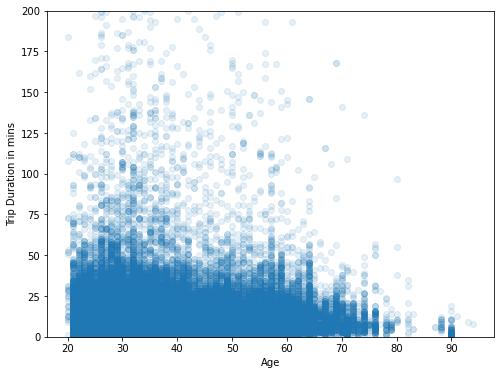

In [24]:
plt.figure(figsize = [8, 6])
plt.scatter(data = data, x = 'age', y = 'duration_min', alpha = 1/9)
plt.xlabel('Age')
plt.ylim(0,200)
plt.ylabel('Trip Duration in mins')
plt.show()

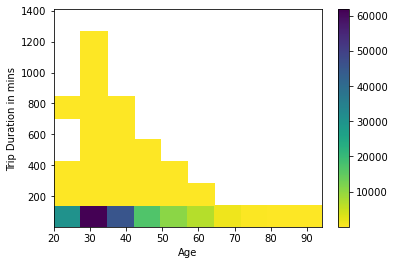

In [25]:
#The yellow color means that at least 5 riders exist in this interval of duration
plt.hist2d(data=data, x='age', y='duration_min', cmin=5, cmap='viridis_r');
plt.xlabel('Age')
plt.ylabel('Trip Duration in mins')
plt.colorbar();

From the above two charts, we can say that the riders with age between 20 and 40 years have the longest rides, which is expected.

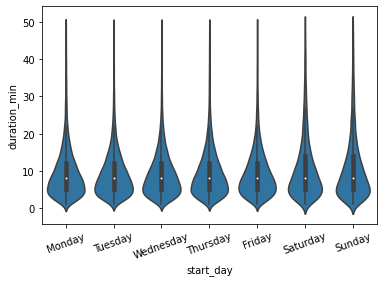

In [29]:
sb.violinplot(data=data.query('duration_min < 50'), x = 'start_day', y = 'duration_min', order=day_order, color=base_color);
plt.xticks(rotation = 20);

From this violin plot I can barely see that Weekends [Sunday and Saturday] have the longest trip. We need to see clearer chart.

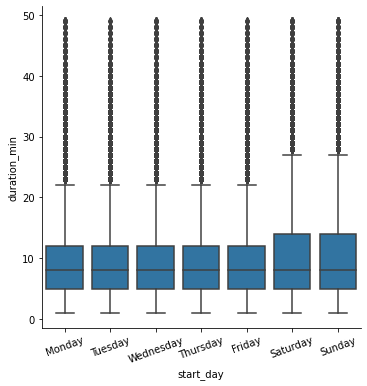

In [30]:
sb.catplot(data=data.query('duration_min < 50'), x="start_day", y="duration_min", order=day_order, kind="box", color=base_color);
plt.xticks(rotation = 20);

I think this is more clearer chart that confirm our sights.

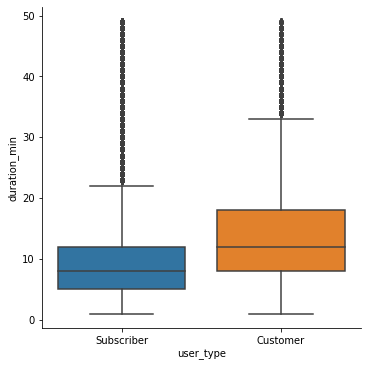

In [285]:
sb.catplot(x="user_type", y="duration_min", kind="box", data=data.query('duration_min < 50'));

Subscribers using bikes for short trips compared with the customers.

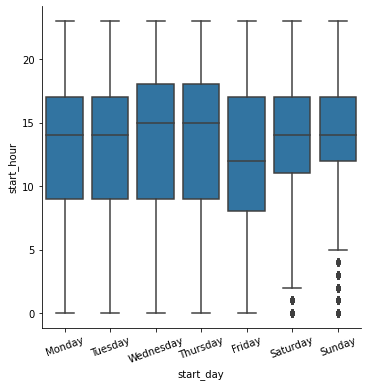

In [31]:
sb.catplot(data=data, x="start_day", y="start_hour", kind="box",order=day_order, color=base_color);
plt.xticks(rotation = 20);

As expected, on weekends the trips start late compared to weekdays.

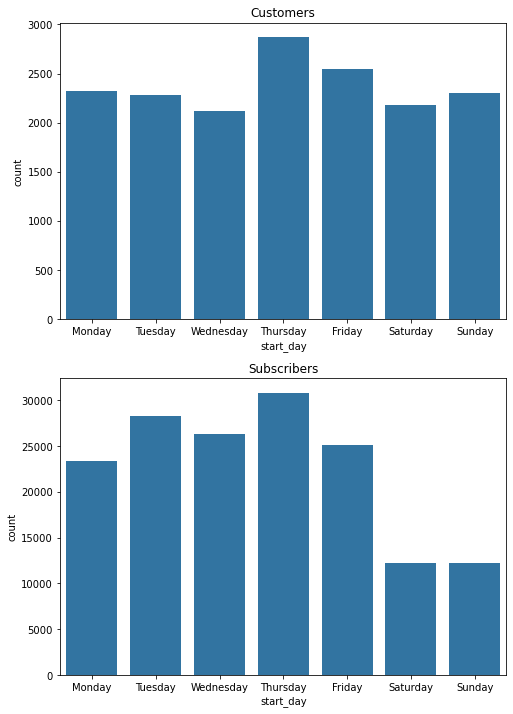

In [32]:
fig, ax = plt.subplots(nrows=2, figsize = [8,12])
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.countplot(data=data.query('user_type == "Customer"'), x='start_day', order=day_order, color=base_color ,ax=ax[0]).set_title("Customers");
sb.countplot(data=data.query('user_type == "Subscriber"'), x='start_day',order=day_order, color=base_color, ax=ax[1]).set_title("Subscribers");

From the above charts, we can find that Subscribers users are the least likely to take trip on weekends.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>The duration of the trip depends on the age, the younger the age, the longer the trip. Also found that the longest trip took part in weekends, also the duration of the trip depends on the user type, subscribers are using bikes for short trips compared with the customers.

>Regarding the trip time, we observed that on weekends the trips start late compared to weekdays, also subscribers users are the least likely to take trip on weekends.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No

## Multivariate Exploration


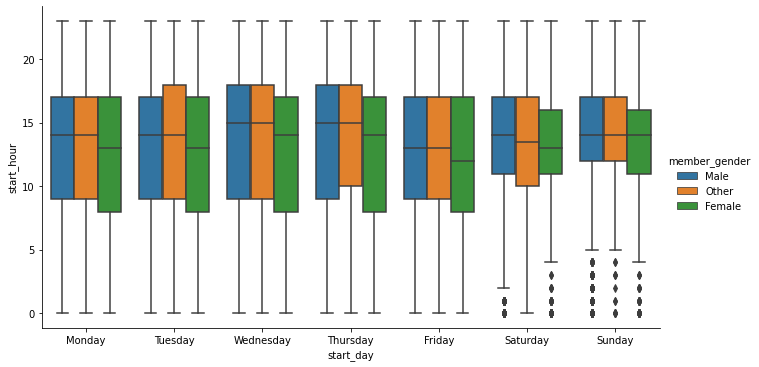

In [33]:
sb.catplot(x="start_day", y="start_hour", hue="member_gender",kind="box", order=day_order, data=data, height=5, aspect=11/6);

From the above chart, we can see that females are starting slightly early than the males.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Starting hours slightly depend on member gender, as females are starting slightly early than the males.

### Were there any interesting or surprising interactions between features?

> No